In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('final_direct_train.csv')

In [3]:
train.columns

Index(['create_dt', 'mdm_object_name', 'mdm_model_id', 'lon', 'lat', 'alt',
       'speed_gps', 'direction', 'accel_forward_nn', 'accel_braking_nn',
       'accel_angular_nn', 'accel_vertical_nn', 'label', 'year', 'month',
       'day', 'hour', 'minute', 'second', 'day_of_week', 'week_of_year',
       'hour_sin', 'hour_cos', 'day_of_week_sin', 'day_of_week_cos'],
      dtype='object')

In [4]:
train['day_of_week'].value_counts()

day_of_week
4    111471
2    109570
5     88250
1     87041
3     57569
6     35772
0     26397
Name: count, dtype: int64

In [5]:
train['is_weekend'] = train['day_of_week'].isin([5, 6]).astype(int)

In [6]:
df = train.copy()

In [7]:
df.dtypes

create_dt             object
mdm_object_name        int64
mdm_model_id           int64
lon                  float64
lat                  float64
alt                    int64
speed_gps            float64
direction            float64
accel_forward_nn     float64
accel_braking_nn     float64
accel_angular_nn     float64
accel_vertical_nn    float64
label                  int64
year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
second                 int64
day_of_week            int64
week_of_year           int64
hour_sin             float64
hour_cos             float64
day_of_week_sin      float64
day_of_week_cos      float64
is_weekend             int32
dtype: object

In [8]:
df['create_dt'] = pd.to_datetime(df['create_dt'])


In [9]:
df.dtypes

create_dt            datetime64[ns]
mdm_object_name               int64
mdm_model_id                  int64
lon                         float64
lat                         float64
alt                           int64
speed_gps                   float64
direction                   float64
accel_forward_nn            float64
accel_braking_nn            float64
accel_angular_nn            float64
accel_vertical_nn           float64
label                         int64
year                          int64
month                         int64
day                           int64
hour                          int64
minute                        int64
second                        int64
day_of_week                   int64
week_of_year                  int64
hour_sin                    float64
hour_cos                    float64
day_of_week_sin             float64
day_of_week_cos             float64
is_weekend                    int32
dtype: object

In [10]:
df

,create_dt,mdm_object_name,mdm_model_id,lon,lat,alt,speed_gps,direction,accel_forward_nn,accel_braking_nn,...,hour,minute,second,day_of_week,week_of_year,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,is_weekend
0,2023-09-26 08:00:12,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,...,8,0,12,1,39,0.866025,-0.500000,0.781831,0.623490,0
1,2023-09-26 08:00:17,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,...,8,0,17,1,39,0.866025,-0.500000,0.781831,0.623490,0
2,2023-09-26 08:00:22,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,...,8,0,22,1,39,0.866025,-0.500000,0.781831,0.623490,0
3,2023-09-26 08:00:27,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,...,8,0,27,1,39,0.866025,-0.500000,0.781831,0.623490,0
4,2023-09-26 08:00:32,119,61,0.007798,0.001680,-90,0.0,19.1,0.0,0.0,...,8,0,32,1,39,0.866025,-0.500000,0.781831,0.623490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516065,2023-09-30 07:27:38,1498,62,-0.009170,0.014315,72,0.0,326.0,0.0,0.0,...,7,27,38,5,39,0.965926,-0.258819,-0.974928,-0.222521,1
516066,2023-09-30 07:27:43,1498,62,-0.009170,0.014315,72,0.0,326.0,0.0,0.0,...,7,27,43,5,39,0.965926,-0.258819,-0.974928,-0.222521,1
516067,2023-09-30 07:27:48,1498,62,-0.009170,0.014315,72,0.0,326.0,0.0,0.0,...,7,27,48,5,39,0.965926,-0.258819,-0.974928,-0.222521,1
516068,2023-09-30 07:27:53,1498,62,-0.009170,0.014315,72,0.0,326.0,0.0,0.0,...,7,27,53,5,39,0.965926,-0.258819,-0.974928,-0.222521,1


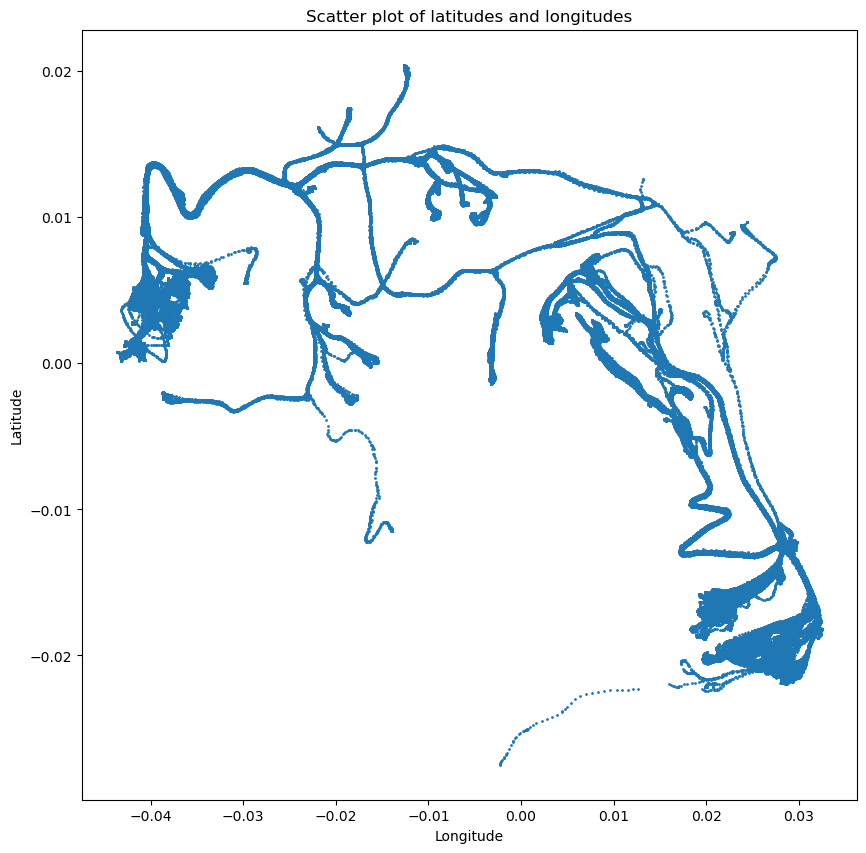

In [11]:
# plot latitudes and longitudes to x and y coordinates
plt.figure(figsize=(10, 10))
plt.scatter(df['lon'], df['lat'], s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot of latitudes and longitudes')
plt.show()

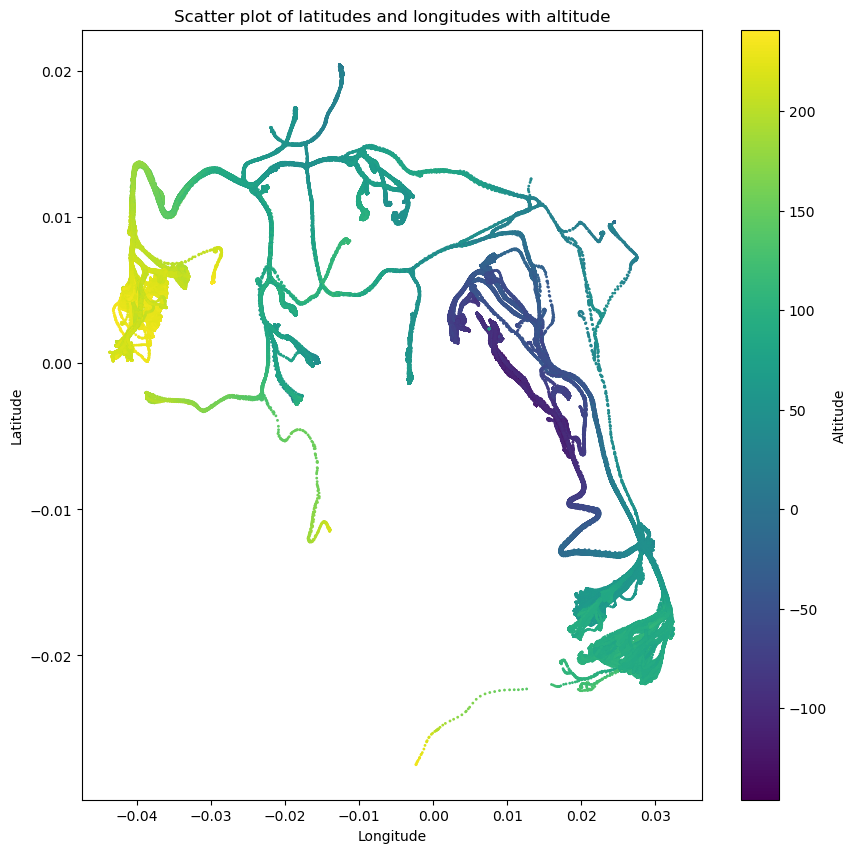

In [12]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'lon', 'lat', and 'alt' columns
plt.figure(figsize=(10, 10))
scatter = plt.scatter(df['lon'], df['lat'], c=df['alt'], s=1, cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot of latitudes and longitudes with altitude')

# Add a color bar to show the altitude scale
cbar = plt.colorbar(scatter)
cbar.set_label('Altitude')

plt.show()

In [13]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming df is your DataFrame with 'lon', 'lat', 'alt', and 'label' columns
# plt.figure(figsize=(10, 10))

# # Use seaborn to create a scatter plot with hue based on the 'label' column
# scatter = sns.scatterplot(x='lon', y='lat', hue='label', size='alt', sizes=(20, 200), data=df, palette='viridis', alpha=0.6)

# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Scatter plot of latitudes and longitudes with altitude and labels')

# # Add a color bar to show the altitude scale
# norm = plt.Normalize(df['alt'].min(), df['alt'].max())
# sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm)
# cbar.set_label('Altitude')

# plt.legend(title='Label')
# plt.show()

In [15]:
df.dtypes

create_dt            datetime64[ns]
mdm_object_name               int64
mdm_model_id                  int64
lon                         float64
lat                         float64
alt                           int64
speed_gps                   float64
direction                   float64
accel_forward_nn            float64
accel_braking_nn            float64
accel_angular_nn            float64
accel_vertical_nn           float64
label                         int64
year                          int64
month                         int64
day                           int64
hour                          int64
minute                        int64
second                        int64
day_of_week                   int64
week_of_year                  int64
hour_sin                    float64
hour_cos                    float64
day_of_week_sin             float64
day_of_week_cos             float64
is_weekend                    int32
dtype: object

In [16]:
df = df.sort_values(by='create_dt')

# Set index as the time column
df = df.set_index('create_dt')


In [17]:
df

,mdm_object_name,mdm_model_id,lon,lat,alt,speed_gps,direction,accel_forward_nn,accel_braking_nn,accel_angular_nn,...,hour,minute,second,day_of_week,week_of_year,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,is_weekend
create_dt,,,,,,,,,,,,,,,,,,,,,
2023-08-09 08:02:54,1038,62,0.005753,0.004778,-50,0.0,326.0,0.000,0.000,0.000,...,8,2,54,2,32,0.866025,-0.500000,0.974928,-0.222521,0
2023-08-09 08:02:54,1038,62,0.005753,0.004778,-50,0.0,326.0,0.000,0.000,0.000,...,8,2,54,2,32,0.866025,-0.500000,0.974928,-0.222521,0
2023-08-09 08:02:59,1038,62,0.005753,0.004778,-50,0.0,326.0,0.000,0.000,0.000,...,8,2,59,2,32,0.866025,-0.500000,0.974928,-0.222521,0
2023-08-09 08:02:59,1038,62,0.005753,0.004778,-50,0.0,326.0,0.000,0.000,0.000,...,8,2,59,2,32,0.866025,-0.500000,0.974928,-0.222521,0
2023-08-09 08:03:04,1038,62,0.005753,0.004778,-50,0.0,326.0,0.000,0.000,0.000,...,8,3,4,2,32,0.866025,-0.500000,0.974928,-0.222521,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-15 15:57:33,125,61,0.013819,0.002965,-51,21.3,110.0,0.000,0.000,0.098,...,15,57,33,4,50,-0.707107,-0.707107,-0.433884,-0.900969,0
2023-12-15 15:57:36,125,61,0.013979,0.002917,-51,14.2,122.0,0.000,0.686,0.000,...,15,57,36,4,50,-0.707107,-0.707107,-0.433884,-0.900969,0
2023-12-15 15:57:39,125,61,0.014139,0.002829,-51,17.1,135.0,0.000,0.784,0.000,...,15,57,39,4,50,-0.707107,-0.707107,-0.433884,-0.900969,0


In [20]:
df.to_csv('final_direct_train_anas.csv', index=False)


In [23]:
feature_columns = df.select_dtypes(include=[np.number]).columns.drop('label')


In [24]:
feature_columns

Index(['mdm_object_name', 'mdm_model_id', 'lon', 'lat', 'alt', 'speed_gps',
       'direction', 'accel_forward_nn', 'accel_braking_nn', 'accel_angular_nn',
       'accel_vertical_nn', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'day_of_week', 'week_of_year', 'hour_sin', 'hour_cos',
       'day_of_week_sin', 'day_of_week_cos', 'is_weekend'],
      dtype='object')

In [31]:
from sktime.datatypes import convert_to
X = df[feature_columns]
y = df['label']

,mdm_object_name,mdm_model_id,lon,lat,alt,speed_gps,direction,accel_forward_nn,accel_braking_nn,accel_angular_nn,...,hour,minute,second,day_of_week,week_of_year,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,is_weekend
create_dt,,,,,,,,,,,,,,,,,,,,,
2023-08-09 08:02:54,1038,62,0.005753,0.004778,-50,0.0,326.0,0.000,0.000,0.000,...,8,2,54,2,32,0.866025,-0.500000,0.974928,-0.222521,0
2023-08-09 08:02:54,1038,62,0.005753,0.004778,-50,0.0,326.0,0.000,0.000,0.000,...,8,2,54,2,32,0.866025,-0.500000,0.974928,-0.222521,0
2023-08-09 08:02:59,1038,62,0.005753,0.004778,-50,0.0,326.0,0.000,0.000,0.000,...,8,2,59,2,32,0.866025,-0.500000,0.974928,-0.222521,0
2023-08-09 08:02:59,1038,62,0.005753,0.004778,-50,0.0,326.0,0.000,0.000,0.000,...,8,2,59,2,32,0.866025,-0.500000,0.974928,-0.222521,0
2023-08-09 08:03:04,1038,62,0.005753,0.004778,-50,0.0,326.0,0.000,0.000,0.000,...,8,3,4,2,32,0.866025,-0.500000,0.974928,-0.222521,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-15 15:57:33,125,61,0.013819,0.002965,-51,21.3,110.0,0.000,0.000,0.098,...,15,57,33,4,50,-0.707107,-0.707107,-0.433884,-0.900969,0
2023-12-15 15:57:36,125,61,0.013979,0.002917,-51,14.2,122.0,0.000,0.686,0.000,...,15,57,36,4,50,-0.707107,-0.707107,-0.433884,-0.900969,0
2023-12-15 15:57:39,125,61,0.014139,0.002829,-51,17.1,135.0,0.000,0.784,0.000,...,15,57,39,4,50,-0.707107,-0.707107,-0.433884,-0.900969,0


In [29]:

# Convert to sktime format
X_panel = convert_to(X, to_type="pd-multiindex", as_scitype="Panel")


AttributeError: module 'dask' has no attribute 'dataframe'

NameError: name 'convert_to' is not defined